In [1]:
from openml import tasks

from tqdm import tqdm

import numpy as np

from classes import GroupStructure

In [2]:
oml_task_ids = [37, 43, 3903, 3904, 3913, 3918, 10093, 9946, 146819, 359955, 189922, 359962, 190392, 167120, 190137, 190410, 168350, 359975, 359972, 146820]
oml_tasks = tasks.get_tasks(oml_task_ids)
oml_tasks

f:\workplace_github\ws2425-tab-ml\code\.venv\Lib\site-packages\openml\tasks\functions.py:372: UserWarning: `download_data` will default to False starting in 0.16. Please set `download_data` explicitly to suppress this warning.
  warnings.warn(
f:\workplace_github\ws2425-tab-ml\code\.venv\Lib\site-packages\openml\tasks\functions.py:380: UserWarning: `download_qualities` will default to False starting in 0.16. Please set `download_qualities` explicitly to suppress this warning.
  warnings.warn(


[OpenML Classification Task
 Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_CLASSIFICATION
 Task ID..............: 37
 Task URL.............: https://www.openml.org/t/37
 Estimation Procedure.: crossvalidation
 Target Feature.......: class
 # of Classes.........: 2
 Cost Matrix..........: Available,
 OpenML Classification Task
 Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_CLASSIFICATION
 Task ID..............: 43
 Task URL.............: https://www.openml.org/t/43
 Estimation Procedure.: crossvalidation
 Target Feature.......: class
 # of Classes.........: 2
 Cost Matrix..........: Available,
 OpenML Classification Task
 Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_CLASSIFICATION
 Task ID..............: 3903
 Task URL.............: https://www.openml.org/t/3903
 Estimation Procedure.: crossvalidation
 Target Feature.......: c
 # of Classes.........: 2
 Cost Matrix..........: Available,
 OpenML Classification Task
 Ta

In [3]:
oml_datasets = [oml_task.get_dataset() for oml_task in oml_tasks]

class_column_in_X = list()
empty_y = list()
classes = list()
names = list()
for oml_dataset in tqdm(oml_datasets):
    class_column = oml_dataset.default_target_attribute
    X, y, _, _ = oml_dataset.get_data()

    class_column_in_X.append(class_column in X.columns)
    empty_y.append(y is None)

    names.append(oml_dataset.name)
    classes.append(X.loc[:, class_column].unique().tolist())
print(f'{all(class_column_in_X)}: {class_column_in_X}')  # X always already includes y
print(f'{all(empty_y)}: {empty_y}')  # y is always None

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 18.97it/s]

True: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
True: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


we see: `X` always includes the target and `y` is always None for our datasets

In [4]:
# define positive classes
positive_classes = ['tested_positive', '1', True, True, 'yes', True, '2', '2', '1', '2', '1', True, '1', '1', '2', '1', '2', 'Anomaly', '1', '2']
for name, cs, class_pos in zip(names, classes, positive_classes):
    print(f'{name}: {cs}, {class_pos}')

diabetes: ['tested_positive', 'tested_negative'], tested_positive
spambase: ['1', '0'], 1
pc3: [False, True], True
jm1: [False, True], True
kc2: ['no', 'yes'], yes
pc1: [False, True], True
banknote-authentication: ['1', '2'], 2
wdbc: ['2', '1'], 2
climate-model-simulation-crashes: ['0', '1'], 1
blood-transfusion-service-center: ['2', '1'], 2
gina: ['0', '1'], 1
kc1: [False, True], True
madeline: ['1', '0'], 1
numerai28.6: ['0', '1'], 1
ozone-level-8hr: ['1', '2'], 2
philippine: ['0', '1'], 1
phoneme: ['1', '2'], 2
Satellite: ['Anomaly', 'Normal'], Anomaly
sylvine: ['1', '0'], 1
wilt: ['2', '1'], 2


In [5]:
oml_task_diabetes = oml_tasks[0]
X, y, categorical_indicator, attribute_names = oml_task_diabetes.get_dataset().get_data()
Xy = X.copy()
Xy

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,tested_negative
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,tested_negative
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,tested_negative
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,tested_positive


In [6]:
Xy.loc[:, 'class'].nunique() == 1

False

In [7]:
tmp, _, _, _ = tasks.get_task(3904).get_dataset().get_data()
tmp.isnull().values.any()

np.True_

In [17]:
gs_1 = GroupStructure(
    [0, 1, 2, 3, 4],
    [1, 1, 1, 1, 1],
    [],
    [[0, 1, 2, 3, 4], 1]
)
gs_2 = GroupStructure(
    [0, 1, 2, 3, 4],
    [1, 1, 1, 1, 1],
    [0, 1, 2, 3, 4],
    [[], 1]
)
gs_3 = GroupStructure(
    [0, 1, 2, 3, 4],
    [1, 1, 1, 1, 1],
    [0, 1],
    [[], 0],
    [[], 0],
    [[2, 3, 4], 1]
)
gs_4 = GroupStructure(
    [0, 1, 2, 3, 4, 5, 6, 7],
    [1, 1, 1, -1, 1, 1, 1, 1],
    [7, 2, 0, 6, 3, 4],
    [[], 1],
    [[1, 5], 0]
)

print(gs_1, gs_1.get_number_of_included_groups() > 0)
print(gs_2, gs_2.get_number_of_included_groups() > 0)
print(gs_3)
print(gs_4)

([], [[[0, 1, 2, 3, 4], 1]]) True
([0, 1, 2, 3, 4], []) False
([0, 1], [[[2, 3, 4], 1]])
([7, 2, 0, 6, 3, 4], [[[1, 5], 0]])


In [ ]:
from pymoo.operators.survival.rank_and_crowding.metrics import calc_crowding_distance
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from nds import ndomsort

In [ ]:
metrics = [
    (0.6435, 0.4531, 0.4532, 0.4533),
    (1, 0, 0, 0),
    (0.245, 0.4537, 0.5453, 0.78968),
    (0.245, 0.4537, 0.5453, 0.78968),
    (0.45637, 0.4533, 0.3547, 0.978),
    (0.45637, 0.4533, 0.3547, 0.978),
    (0.452, 0.4539, 0.4533, 0.4531),
    (0.452, 0.4539, 0.4533, 0.4531),
    (0.8453, 0.345, 0.78, 0.45),
    (0.4534, 0.78, 0.4235, 0.451),
    (0.4435, 0.4538, 0.4531, 0.4453),
    (0.4435, 0.4538, 0.4531, 0.4453),
    (0, 1, 1, 1)
]
F = np.array(metrics)

ids = np.array([0, 6])

cds = calc_crowding_distance(F)
print(cds, cds.shape)

print(ids[np.argmax(cds[ids])])

[0.2085025       inf 0.168445  0.155405  0.1365475 0.0695825 0.0027
 0.104925  0.3175    0.1629925 0.168375  0.00335         inf] (13,)
0


In [ ]:
nds_1 = ndomsort.non_domin_sort(
    metrics + [(0.6, 0, 0, 0)],
    get_objectives=lambda performance_tup: (1 - performance_tup[0], *[performance_tup[i] for i in range(1, len(performance_tup))]),  # compute pareto fronts w.r.t. reference (worst) point (0, 1, 1, 1)
    only_front_indices=True
)
nds_1

(1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1)

In [ ]:
nds_obj = NonDominatedSorting()
metrics = [(1 - metric[0], *metric[1:]) for metric in metrics]
nds_2 = nds_obj.do(np.array(metrics + [(1 - 0.6, 0, 0, 0)]), return_rank=True)
nds_2

([array([1]),
  array([ 0,  8, 13]),
  array([ 2,  3,  4,  5,  6,  7,  9, 10, 11]),
  array([12])],
 array([1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1]))

In [ ]:
nds_2[1]

array([1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1])

In [2]:
from pymoo.indicators.hv import HV

In [17]:
ref = (1, 1, 1, 1)
hv = HV(ref_point=ref, nds=False)

pf = np.array([[0.81804, 0.375, 0.0, 0.0], [0.80425, 0.125, 0.0, 0.0], [0.84119, 0.625, 0.03571, 0.25], [0.82907, 0.375, 0.03571, 0.0], [0.82762, 0.5, 0.0, 0.125], [0.81842, 0.25, 0.03571, 0.0], [0.65039, 0.0, 0.0, 0.0]])
pf = np.array([[0.80293062, 0.25, 0.03571429, 0.], [0.72340453, 0.125, 0., 0.], [0.78108042, 0.125, 0., 0.125], [0.65039062, 0., 0., 0.]])
pf = np.subtract(pf, (1, 0, 0, 0)) * (-1, 1, 1, 1)
pf
hv(pf)

0.7794522746722189

In [18]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [78]:
import matplotlib.pyplot as plt
import json

In [98]:
with open('export/diabetes/gen-0.json', 'r') as f:
    file_content = json.load(f)
    
population = file_content['population']
offspring = file_content['offspring']
pareto_front = file_content['pareto']

offspring[0]

{'total_layers': 3,
 'nodes_per_hidden_layer': 4,
 'p_dropout': 0.3,
 'group_structure': {'all_features': [2, 3, 6, 1, 5, 0, 7, 4],
  'feature_signs': [1, 1, 1, 1, 1, 1, 1, 1],
  'excluded': [2, 3, 6],
  'included': [[[1, 5], 0], [[0], 0], [[7], 0], [[4], 0]]}}

In [80]:
ids = np.random.choice(a=len(population), size=4, replace=False)

In [81]:
epochs = [population[id]['metrics']['epochs'][0] for id in ids]
epochs

[140, 451, 11, 246]

[0.63101, 0.51274, 0.65828, 0.6423]
[0.65313, 0.57534, 0.63383, 0.61674]
[0.65313, 0.57534, 0.63383, 0.61674]
[202, 456, 202, 250]


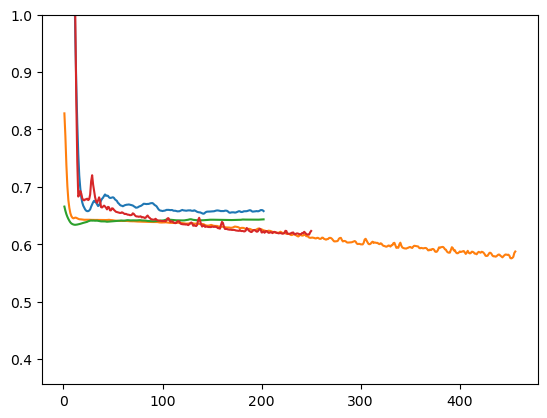

In [96]:
lowest_losses = [population[id]['metrics']['performance']['loss'][0][0] for id in ids]
print(lowest_losses)

ys = [population[id]['metrics']['performance']['loss'][0][1] for id in ids]
print([min(y) for y in ys])
print([y[epoch] for y, epoch in zip(ys, epochs)])

xs = [[j+1 for j in range(len(y))] for y in ys]
for x, y in zip(xs, ys):
    plt.plot(x, y)
plt.ylim(top=1)
#plt.yscale('log')
print([len(y) for y in ys])